<a href="https://colab.research.google.com/github/joaovictordds/a.e.prev-fraudes/blob/main/Modelos_German_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modelo de Classificaçao

In [ ]:
!pip install pycaret

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 21) # Codigo para mostrar todas as colunas do dataset.
dados = pd.read_csv('https://raw.githubusercontent.com/joaovictordds/a.e.prev-fraudes/main/german.csv')
dados.sample(5)

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
170,negativo,15,primeira vez,carro novo,950,<100,> 7 anos,4,masculino/solteiro,nenhum,3,carro,33,nenhum,alugada,2,nível 2,2,não,não,mau
275,sem conta,9,pagamento em dia,radio/televisão,2697,<100,"[1,4) anos",1,masculino/solteiro,nenhum,2,imobiliario,32,nenhum,própria,1,nível 2,2,não,não,bom
844,sem conta,18,pagamento em dia,móveis,3422,<100,> 7 anos,4,masculino/solteiro,nenhum,4,seguro de vida,47,bancos,própria,3,nível 2,2,sim,não,bom
375,negativo,48,creditos quitados,negócios,7685,<100,"[4,7) anos",2,feminino/divorciado,fiador,4,carro,37,nenhum,alugada,1,nível 2,1,não,não,mau
919,negativo,24,pagamento em dia,móveis,3345,<100,> 7 anos,4,masculino/solteiro,nenhum,2,seguro de vida,39,nenhum,alugada,1,nível 3,1,sim,não,mau


In [5]:
from pycaret.classification import *

In [6]:
modelo = setup(data=dados, target='pagador', normalize= True, train_size= 0.8,
               ignore_low_variance= True, combine_rare_levels=True) 

,Description,Value
0,session_id,4572
1,Target,pagador
2,Target Type,Binary
3,Label Encoded,"bom: 0, mau: 1"
4,Original Data,"(1000, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
modelo = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7500,0.7749,0.3887,0.6300,0.4742,0.3275,0.3448,0.514
ridge,Ridge Classifier,0.7488,0.0000,0.4838,0.6071,0.5344,0.3668,0.3732,0.019
et,Extra Trees Classifier,0.7488,0.7600,0.4060,0.6160,0.4817,0.3312,0.3452,0.495
ada,Ada Boost Classifier,0.7475,0.7660,0.4923,0.6013,0.5376,0.3681,0.3732,0.124
lda,Linear Discriminant Analysis,0.7475,0.7687,0.5002,0.5998,0.5412,0.3704,0.3755,0.025
lr,Logistic Regression,0.7425,0.7724,0.4797,0.5919,0.5251,0.3530,0.3589,0.297
lightgbm,Light Gradient Boosting Machine,0.7400,0.7675,0.4793,0.5930,0.5268,0.3510,0.3569,0.113
gbc,Gradient Boosting Classifier,0.7350,0.7627,0.4428,0.5854,0.4995,0.3258,0.3339,0.186
knn,K Neighbors Classifier,0.7200,0.7149,0.3765,0.5509,0.4436,0.2682,0.2774,0.118
nb,Naive Bayes,0.6875,0.7179,0.6327,0.5038,0.5552,0.3247,0.3312,0.017


In [8]:
modelo_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7750,0.7820,0.4167,0.7143,0.5263,0.3919,0.4164
1,0.7375,0.7946,0.3333,0.6154,0.4324,0.2808,0.3032
2,0.7500,0.8188,0.4167,0.6250,0.5000,0.3421,0.3546
3,0.7500,0.8292,0.5000,0.6000,0.5455,0.3750,0.3780
4,0.8125,0.8158,0.5833,0.7368,0.6512,0.5253,0.5320
5,0.7750,0.8263,0.4583,0.6875,0.5500,0.4079,0.4228
6,0.7500,0.7113,0.2917,0.7000,0.4118,0.2857,0.3299
7,0.6875,0.6931,0.1667,0.4444,0.2424,0.0942,0.1122
8,0.6750,0.6800,0.2000,0.4545,0.2778,0.1073,0.1224
9,0.7875,0.7975,0.5200,0.7222,0.6047,0.4646,0.4763


In [9]:
modelo_calibrado = tune_model(modelo_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7625,0.8222,0.2083,1.0000,0.3448,0.2692,0.3944
1,0.7625,0.8445,0.2083,1.0000,0.3448,0.2692,0.3944
2,0.7750,0.7991,0.3750,0.7500,0.5000,0.3750,0.4125
3,0.6875,0.8229,0.1667,0.4444,0.2424,0.0942,0.1122
4,0.7375,0.8095,0.1250,1.0000,0.2222,0.1667,0.3015
5,0.7375,0.8400,0.2500,0.6667,0.3636,0.2391,0.2849
6,0.7250,0.7336,0.1667,0.6667,0.2667,0.1667,0.2278
7,0.7375,0.7195,0.1667,0.8000,0.2759,0.1923,0.2817
8,0.6750,0.7295,0.0400,0.3333,0.0714,0.0048,0.0089
9,0.7500,0.7716,0.2400,0.8571,0.3750,0.2760,0.3639


In [10]:
pred = predict_model(modelo_calibrado)
pred.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.735,0.7834,0.1379,0.7273,0.2319,0.1536,0.2325


,duração,quantia,idade,conta_200+,conta_0-200),conta_negativo,conta_sem conta,historico_conta crítica,historico_creditos quitados,historico_já atrasou pagamentos,historico_pagamento em dia,historico_primeira vez,motivo_carro novo,motivo_carro usado,motivo_educação,motivo_itens de casa,motivo_móveis,motivo_negócios,motivo_others_infrequent,motivo_radio/televisão,motivo_reparos,poupança_<100,poupança_>1000,poupança_100-500),poupança_500-1000),poupança_sem conta,emprego_< 1 ano,emprego_> 7 anos,emprego_14) anos,emprego_47) anos,emprego_desempregado,taxa_1,taxa_2,taxa_3,taxa_4,status_feminino/divorciado,status_masculino/casado,status_masculino/divorciado,status_masculino/solteiro,garantia_co-aplicante,garantia_fiador,garantia_nenhum,residencia_1,residencia_2,residencia_3,residencia_4,propriedades_carro,propriedades_imobiliario,propriedades_seguro de vida,propriedades_sem propriedades,financiamentos_bancos,financiamentos_lojas,financiamentos_nenhum,moradia_alugada,moradia_de graça,moradia_própria,creditos_1,creditos_2,creditos_3,creditos_4,trabalho_desempregado,trabalho_nível 1,trabalho_nível 2,trabalho_nível 3,dependentes_2,telefone_não,pagador,Label,Score
0,-1.213496,-0.725432,0.664666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,bom,bom,0.6166
1,0.269517,-0.142975,1.538939,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,bom,bom,0.8603
2,0.269517,-0.697237,-0.297034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,mau,bom,0.5373
3,0.763855,-0.056605,0.402384,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,bom,bom,0.9196
4,0.269517,1.136147,0.752093,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,bom,bom,0.6204
5,-0.636769,-0.651911,2.500640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,bom,bom,0.8600
6,0.269517,0.659688,0.577239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,bom,bom,0.7366
7,2.246868,1.615817,0.577239,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,mau,mau,0.5455
8,-0.719159,-0.703661,1.888649,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,bom,bom,0.8470
9,2.246868,0.663971,-0.471889,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [ ]:
evaluate_model(modelo_calibrado)

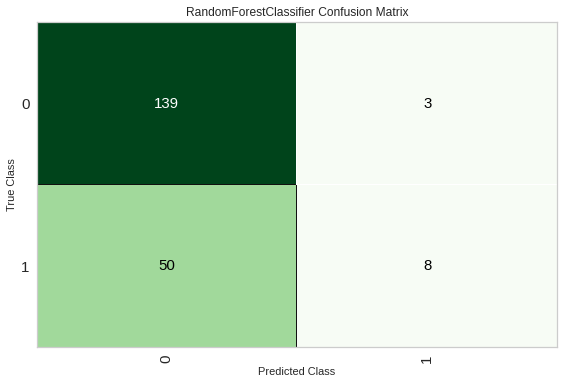

In [13]:
# Matriz de Confusão
plot_model(modelo_calibrado, plot= 'confusion_matrix')

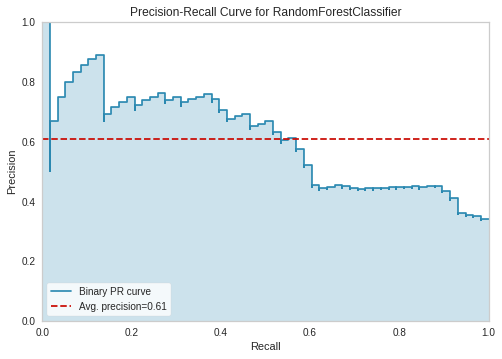

In [11]:
plot_model(modelo_calibrado, plot = 'pr')

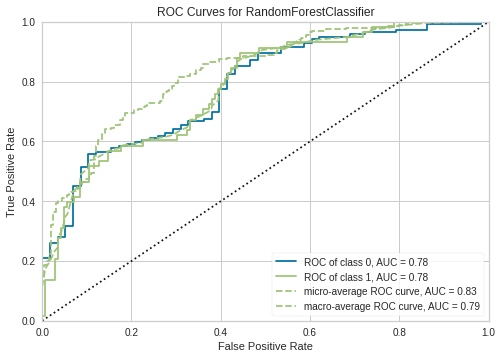

In [14]:
plot_model(modelo_calibrado, plot= 'auc')

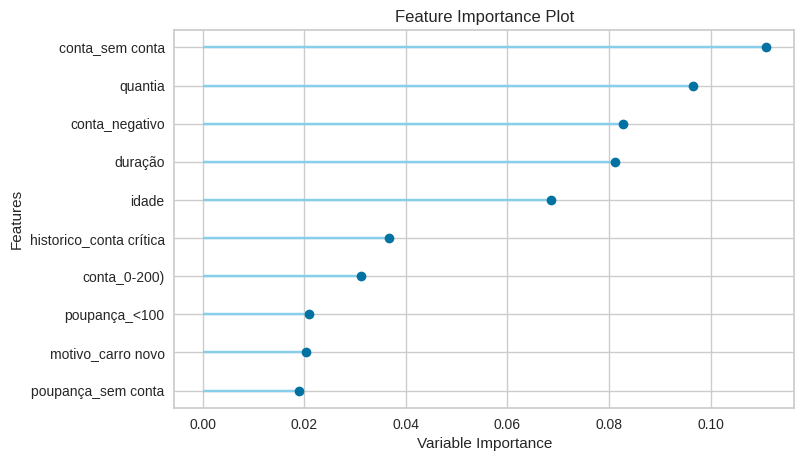

In [12]:
# Variáveis Mais importantes
plot_model(modelo_calibrado, plot = 'feature')

In [17]:
dados.head(3)

,conta,duração,historico,motivo,quantia,poupança,emprego,taxa,status,garantia,residencia,propriedades,idade,financiamentos,moradia,creditos,trabalho,dependentes,telefone,estrangeiro,pagador
0,negativo,6,conta crítica,radio/televisão,1169,sem conta,> 7 anos,4,masculino/solteiro,nenhum,4,imobiliario,67,nenhum,própria,2,nível 2,1,sim,não,bom
1,[0-200),48,pagamento em dia,radio/televisão,5951,<100,"[1,4) anos",2,feminino/divorciado,nenhum,2,imobiliario,22,nenhum,própria,1,nível 2,1,não,não,mau
2,sem conta,12,conta crítica,educação,2096,<100,"[4,7) anos",2,masculino/solteiro,nenhum,3,imobiliario,49,nenhum,própria,1,nível 1,2,não,não,bom


In [18]:
dados1 = dados.copy()
dados1.drop(columns=['historico', 'motivo', 'taxa', 'status',	'garantia',	'residencia',	'propriedades', 'financiamentos',	'moradia', 'dependentes',	'telefone',	'estrangeiro'], inplace=True)
dados1.head(3)

,conta,duração,quantia,poupança,emprego,idade,creditos,trabalho,pagador
0,negativo,6,1169,sem conta,> 7 anos,67,2,nível 2,bom
1,[0-200),48,5951,<100,"[1,4) anos",22,1,nível 2,mau
2,sem conta,12,2096,<100,"[4,7) anos",49,1,nível 1,bom


In [33]:
modelo = setup(data=dados1, target='pagador', normalize= True, train_size= 0.8,
               ignore_low_variance= True, combine_rare_levels=True) 

,Description,Value
0,session_id,2190
1,Target,pagador
2,Target Type,Binary
3,Label Encoded,"bom: 0, mau: 1"
4,Original Data,"(1000, 9)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
modelo = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7525,0.7440,0.4610,0.6288,0.5279,0.3668,0.3769,0.134
rf,Random Forest Classifier,0.7488,0.7551,0.4487,0.6350,0.5187,0.3564,0.3704,0.513
et,Extra Trees Classifier,0.7438,0.7401,0.4938,0.6064,0.5408,0.3661,0.3722,0.463
ada,Ada Boost Classifier,0.7300,0.7261,0.4740,0.5727,0.5143,0.3309,0.3362,0.113
lr,Logistic Regression,0.7275,0.7554,0.3997,0.5800,0.4632,0.2926,0.3062,0.030
lda,Linear Discriminant Analysis,0.7275,0.7531,0.4203,0.5806,0.4779,0.3028,0.3150,0.019
lightgbm,Light Gradient Boosting Machine,0.7213,0.7296,0.4575,0.5528,0.4976,0.3084,0.3126,0.058
ridge,Ridge Classifier,0.7163,0.0000,0.3588,0.5539,0.4240,0.2525,0.2671,0.015
knn,K Neighbors Classifier,0.6962,0.6801,0.3868,0.5107,0.4335,0.2335,0.2407,0.118
svm,SVM - Linear Kernel,0.6900,0.0000,0.3417,0.4552,0.3774,0.1946,0.1992,0.019


In [35]:
top5 = compare_models(sort='f1', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6325,0.7247,0.7370,0.4517,0.5533,0.2801,0.3079,0.015
et,Extra Trees Classifier,0.7438,0.7401,0.4938,0.6064,0.5408,0.3661,0.3722,0.469
gbc,Gradient Boosting Classifier,0.7525,0.7440,0.4610,0.6288,0.5279,0.3668,0.3769,0.132
rf,Random Forest Classifier,0.7488,0.7551,0.4487,0.6350,0.5187,0.3564,0.3704,0.513
ada,Ada Boost Classifier,0.7300,0.7261,0.4740,0.5727,0.5143,0.3309,0.3362,0.112
lightgbm,Light Gradient Boosting Machine,0.7213,0.7296,0.4575,0.5528,0.4976,0.3084,0.3126,0.058
lda,Linear Discriminant Analysis,0.7275,0.7531,0.4203,0.5806,0.4779,0.3028,0.3150,0.018
lr,Logistic Regression,0.7275,0.7554,0.3997,0.5800,0.4632,0.2926,0.3062,0.031
dt,Decision Tree Classifier,0.6600,0.6055,0.4658,0.4422,0.4510,0.2062,0.2078,0.017
knn,K Neighbors Classifier,0.6962,0.6801,0.3868,0.5107,0.4335,0.2335,0.2407,0.121


In [36]:
melhores_tunados = []
for i in range(len(top5)):
    melhores_tunados.append(tune_model(top5[i], optimize='f1'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6875,0.6109,0.4583,0.4783,0.4681,0.2470,0.2471
1,0.7625,0.7809,0.5417,0.6190,0.5778,0.4136,0.4154
2,0.6875,0.6510,0.3333,0.4706,0.3902,0.1883,0.1934
3,0.7500,0.7180,0.5417,0.5909,0.5652,0.3902,0.3910
4,0.7500,0.7768,0.3333,0.6667,0.4444,0.3056,0.3361
5,0.6625,0.6979,0.3333,0.4211,0.3721,0.1456,0.1474
6,0.7500,0.7574,0.3750,0.6429,0.4737,0.3243,0.3446
7,0.7750,0.7971,0.4800,0.7059,0.5714,0.4263,0.4409
8,0.7125,0.7349,0.4000,0.5556,0.4651,0.2756,0.2825
9,0.7250,0.7418,0.4000,0.5882,0.4762,0.2988,0.3090


In [37]:
# Fazendo um blend dos cinco modelos
blend = blend_models(melhores_tunados)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7125,0.7388,0.6667,0.5161,0.5818,0.3681,0.3751
1,0.6500,0.7589,0.7083,0.4474,0.5484,0.2857,0.3059
2,0.6750,0.6882,0.6667,0.4706,0.5517,0.3085,0.3200
3,0.7375,0.7463,0.7083,0.5484,0.6182,0.4231,0.4311
4,0.7625,0.8065,0.6250,0.6000,0.6122,0.4412,0.4414
5,0.6625,0.6897,0.7500,0.4615,0.5714,0.3182,0.3438
6,0.8000,0.8415,0.5833,0.7000,0.6364,0.5000,0.5040
7,0.7625,0.8276,0.6400,0.6154,0.6275,0.4532,0.4534
8,0.7250,0.7484,0.6000,0.5556,0.5769,0.3737,0.3743
9,0.6750,0.7484,0.5600,0.4828,0.5185,0.2753,0.2770


In [38]:
pred = predict_model(blend)
pred.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.715,0.7576,0.5263,0.5,0.5128,0.3116,0.3118


,duração,quantia,idade,conta_200+,conta_0-200),conta_negativo,conta_sem conta,poupança_<100,poupança_>1000,poupança_100-500),poupança_500-1000),poupança_sem conta,emprego_< 1 ano,emprego_> 7 anos,emprego_14) anos,emprego_47) anos,emprego_desempregado,creditos_1,creditos_2,creditos_3,creditos_4,trabalho_desempregado,trabalho_nível 1,trabalho_nível 2,trabalho_nível 3,pagador,Label,Score
0,-0.246875,0.125974,0.116911,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,bom,bom,0.5607
1,-0.494679,-0.524756,-0.838352,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,mau,bom,0.6218
2,0.248733,-0.092592,-1.359404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,mau,bom,0.5730
3,0.744341,-0.260774,0.290595,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,bom,mau,0.6305
4,-0.742482,-0.910439,-0.056773,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,mau,mau,0.6811
5,-1.238090,-0.983886,-0.664667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,bom,bom,0.6242
6,3.222380,2.443624,-1.272562,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,bom,bom,0.5897
7,-0.246875,-0.510918,-0.664667,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,bom,bom,0.7794
8,0.248733,3.307598,0.724805,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,mau,mau,0.7798
9,0.248733,-0.673778,0.377437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,mau,mau,0.5668


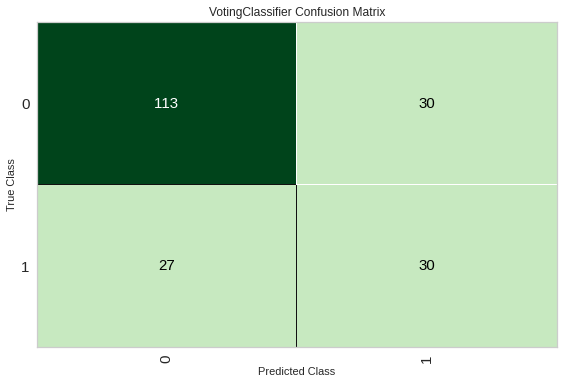

In [39]:
# Matriz de Confusão
plot_model(blend, plot= 'confusion_matrix')

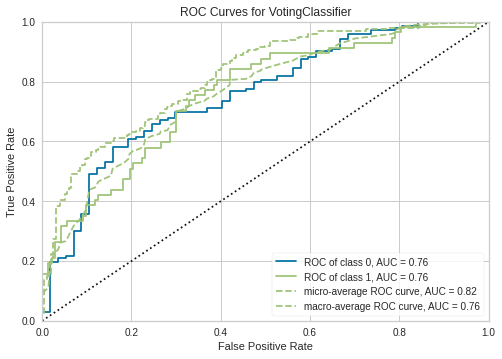

In [40]:
plot_model(blend, plot = 'auc')

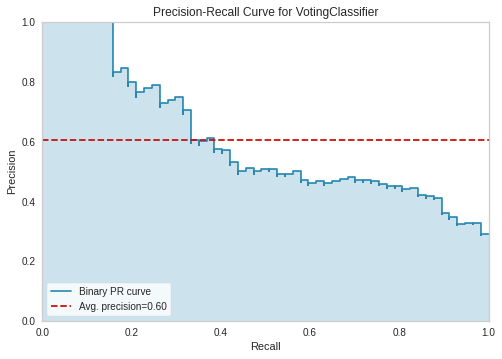

In [41]:
plot_model(blend, plot = 'pr')

In [42]:
# Finalizando o modelo
modelo_final = finalize_model(blend)

In [43]:
# Salvando o modelo para uso posterior no formato .pkl
save_model(modelo_final, 'modelo_class')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='pagador',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                       min_samples_split=10,
                                                                       min_weight_fraction_leaf=0.0,
                                                                       n_estimat

In [21]:
modelo_gb = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.8609,0.5833,0.7000,0.6364,0.5000,0.5040
1,0.7000,0.7217,0.5833,0.5000,0.5385,0.3182,0.3203
2,0.7750,0.7649,0.4583,0.6875,0.5500,0.4079,0.4228
3,0.7750,0.7738,0.5417,0.6500,0.5909,0.4375,0.4410
4,0.7250,0.7217,0.3333,0.5714,0.4211,0.2568,0.2728
5,0.7375,0.7344,0.4167,0.5882,0.4878,0.3182,0.3267
6,0.8125,0.8810,0.5833,0.7368,0.6512,0.5253,0.5320
7,0.7375,0.6514,0.2174,0.6250,0.3226,0.2045,0.2486
8,0.8000,0.7921,0.4783,0.7333,0.5789,0.4553,0.4732
9,0.7750,0.8299,0.5217,0.6316,0.5714,0.4208,0.4243


In [22]:
modelo_calibrado = tune_model(modelo_gb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.8378,0.4583,0.6111,0.5238,0.3590,0.3658
1,0.7000,0.7716,0.4167,0.5000,0.4545,0.2500,0.2520
2,0.7375,0.7902,0.3750,0.6000,0.4615,0.3000,0.3145
3,0.7750,0.7723,0.5000,0.6667,0.5714,0.4231,0.4311
4,0.7000,0.7054,0.2917,0.5000,0.3684,0.1892,0.2010
5,0.7500,0.7842,0.4167,0.6250,0.5000,0.3421,0.3546
6,0.8000,0.8780,0.4583,0.7857,0.5789,0.4595,0.4882
7,0.6875,0.6285,0.0870,0.3333,0.1379,0.0215,0.0288
8,0.7875,0.7979,0.4783,0.6875,0.5641,0.4295,0.4419
9,0.8250,0.7803,0.5217,0.8000,0.6316,0.5234,0.5440


In [23]:
pred = predict_model(modelo_calibrado)
pred.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7,0.6916,0.4127,0.5306,0.4643,0.2604,0.2644


,duração,quantia,idade,conta_200+,conta_0-200),conta_negativo,conta_sem conta,poupança_<100,poupança_>1000,poupança_100-500),poupança_500-1000),poupança_sem conta,emprego_< 1 ano,emprego_> 7 anos,emprego_14) anos,emprego_47) anos,emprego_desempregado,creditos_1,creditos_2,creditos_3,creditos_4,trabalho_desempregado,trabalho_nível 1,trabalho_nível 2,trabalho_nível 3,pagador,Label,Score
0,0.260348,0.536388,-0.407964,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,mau,mau,0.5465
1,0.512704,1.751175,0.571060,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,mau,mau,0.5056
2,-0.749077,-0.442797,-0.763973,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,bom,bom,0.7049
3,-0.749077,-0.844950,-1.119981,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,mau,bom,0.5941
4,0.260348,-0.707891,1.906093,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,bom,bom,0.6086
5,-0.917315,-0.368195,-0.941977,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,mau,bom,0.8949
6,1.269773,3.241118,1.016071,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,mau,mau,0.7424
7,-0.749077,-0.802618,1.016071,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,bom,bom,0.7380
8,-0.749077,-0.723853,-0.763973,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,bom,bom,0.8576
9,0.765060,1.011755,-1.030979,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,bom,mau,0.5284


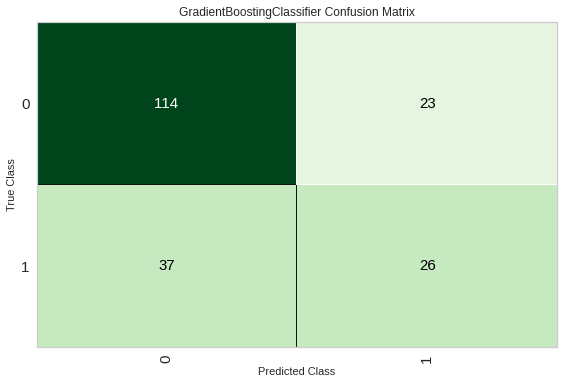

In [24]:
# Matriz de Confusão
plot_model(modelo_calibrado, plot= 'confusion_matrix')

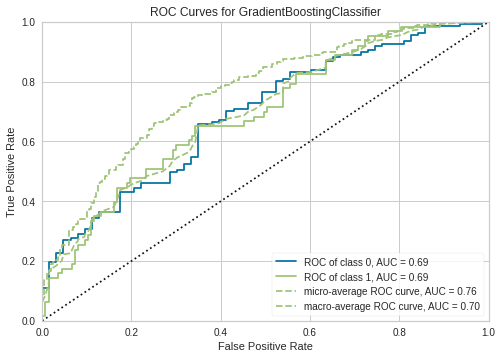

In [26]:
plot_model(modelo_calibrado, plot = 'auc')

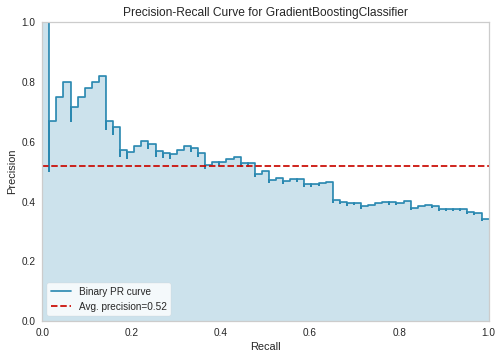

In [25]:
plot_model(modelo_calibrado, plot = 'pr')

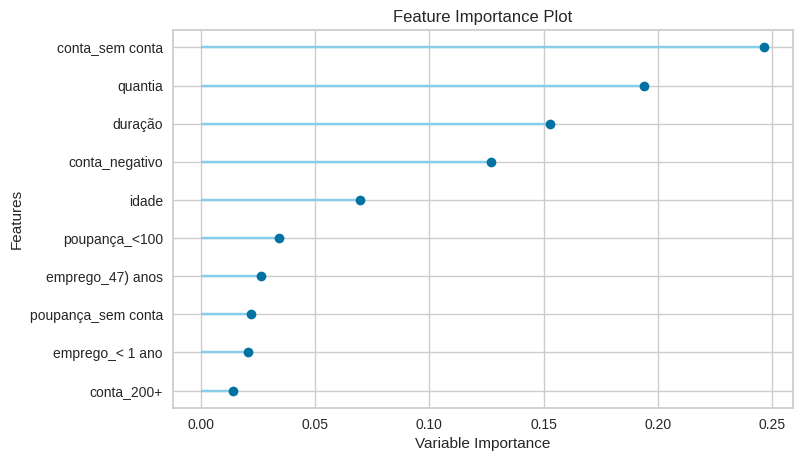

In [27]:
# Variáveis Mais importantes
plot_model(modelo_calibrado, plot = 'feature')

In [ ]:
modelo = setup(data=dados2, target='pagador', normalize= True, train_size= 0.8,
               ignore_low_variance= True, combine_rare_levels=True) 
modelo = compare_models()
modelo_gb = create_model('gbc')
modelo_calibrado = tune_model(modelo_gb)
pred = predict_model(modelo_calibrado)
pred.head(10)
# Matriz de Confusão
plot_model(modelo_calibrado, plot= 'confusion_matrix')
plot_model(modelo_calibrado, plot = 'auc')
plot_model(modelo_calibrado, plot = 'pr')
# Variáveis Mais importantes
plot_model(modelo_calibrado, plot = 'feature')

In [ ]:
# Finalizando o modelo
modelo_final = finalize_model(combinacao_soft)

In [ ]:
# Salvando o modelo para uso posterior no formato .pkl
save_model(modelo_final, 'modelo_projetoX')

### Modelo de Regressão

In [44]:
dados1.head()

,conta,duração,quantia,poupança,emprego,idade,creditos,trabalho,pagador
0,negativo,6,1169,sem conta,> 7 anos,67,2,nível 2,bom
1,[0-200),48,5951,<100,"[1,4) anos",22,1,nível 2,mau
2,sem conta,12,2096,<100,"[4,7) anos",49,1,nível 1,bom
3,negativo,42,7882,<100,"[4,7) anos",45,1,nível 2,bom
4,negativo,24,4870,<100,"[1,4) anos",53,2,nível 2,mau


In [45]:
from pycaret.regression import *

In [46]:
regressao = setup(data= dados1, target='quantia', normalize= True)

,Description,Value
0,session_id,5795
1,Target,quantia
2,Original Data,"(1000, 9)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(699, 25)"


In [48]:
comparacao = compare_models(sort='RMSLE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
par,Passive Aggressive Regressor,1434.0742,4.928428e+06,2184.4236,0.3908,0.5910,0.5065,0.021
omp,Orthogonal Matching Pursuit,1490.1967,4.570918e+06,2117.6225,0.4157,0.6055,0.6132,0.013
huber,Huber Regressor,1454.2866,4.890931e+06,2177.1254,0.3944,0.6062,0.5394,0.038
gbr,Gradient Boosting Regressor,1534.3107,5.154825e+06,2257.0575,0.3220,0.6086,0.6270,0.081
llar,Lasso Least Angle Regression,1509.3257,4.607034e+06,2125.6331,0.4131,0.6215,0.6265,0.016
rf,Random Forest Regressor,1596.3192,5.577065e+06,2341.1381,0.2670,0.6219,0.6510,0.550
lightgbm,Light Gradient Boosting Machine,1548.6359,5.240027e+06,2268.4077,0.3240,0.6229,0.6225,0.044
br,Bayesian Ridge,1510.8821,4.616120e+06,2126.5141,0.4127,0.6337,0.6293,0.014
lasso,Lasso Regression,1519.9825,4.638704e+06,2133.6934,0.4077,0.6356,0.6296,0.016
ridge,Ridge Regression,1520.0576,4.641331e+06,2134.2217,0.4074,0.6366,0.6300,0.015


In [50]:
modelo_dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2081.5571,8.776059e+06,2962.4414,-0.6103,0.8826,0.7892
1,2225.2643,1.021075e+07,3195.4258,-0.6758,0.8146,0.9696
2,2459.8000,1.000596e+07,3163.2206,-0.6108,0.9316,0.9776
3,2371.5857,1.147025e+07,3386.7757,0.0353,0.8391,0.8871
4,2464.3857,1.375334e+07,3708.5498,-0.5979,0.8694,0.8725
5,1721.2286,5.655702e+06,2378.1719,0.4646,0.7680,0.7391
6,2056.2000,9.347059e+06,3057.2960,-1.0694,0.9094,1.1069
7,1827.6571,7.263406e+06,2695.0707,-0.3123,0.7482,0.6943
8,2549.6929,1.353466e+07,3678.9479,-0.4184,0.9073,0.9610
9,2023.0435,9.213221e+06,3035.3287,0.2838,0.7849,0.6977


In [51]:
calibrado = tune_model(modelo_dt, optimize='RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1875.2288,7.307418e+06,2703.2236,-0.3409,0.6747,0.6633
1,1733.4646,6.692994e+06,2587.0822,-0.0984,0.6708,0.7467
2,1627.0032,5.750703e+06,2398.0623,0.0742,0.6927,0.6279
3,2122.4463,1.026153e+07,3203.3624,0.1369,0.7101,0.7314
4,1653.3280,8.664184e+06,2943.4987,-0.0066,0.6299,0.5325
5,1397.4253,3.639707e+06,1907.8016,0.6554,0.5940,0.6046
6,1672.0936,6.566367e+06,2562.4923,-0.4538,0.7292,0.8880
7,1652.4132,5.220484e+06,2284.8379,0.0568,0.7084,0.7450
8,2049.9240,1.135047e+07,3369.0451,-0.1895,0.6846,0.7257
9,1945.0686,8.890648e+06,2981.7189,0.3089,0.7225,0.7284


In [52]:
# Aplicando o modelo selecionado nos dados de teste:
pred = predict_model(calibrado)
# Verificando os dados preditos (label) com o real
pred.head(5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1702.8492,6.956638e+06,2637.5438,0.0599,0.6739,0.7372


,duração,idade,conta_200+,conta_0-200),conta_negativo,conta_sem conta,poupança_<100,poupança_>1000,poupança_100-500),poupança_500-1000),poupança_sem conta,emprego_< 1 ano,emprego_> 7 anos,emprego_14) anos,emprego_47) anos,emprego_desempregado,creditos_1,creditos_2,creditos_3,creditos_4,trabalho_desempregado,trabalho_nível 1,trabalho_nível 2,trabalho_nível 3,pagador_mau,quantia,Label
0,-0.238512,-0.403971,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1928.0,2096.5625
1,-0.735935,-1.187140,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,741.0,2662.5000
2,0.756335,-0.839065,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4280.0,2847.8000
3,3.243453,0.031123,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7297.0,5179.7000
4,-0.735935,-1.100121,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,836.0,1340.1875


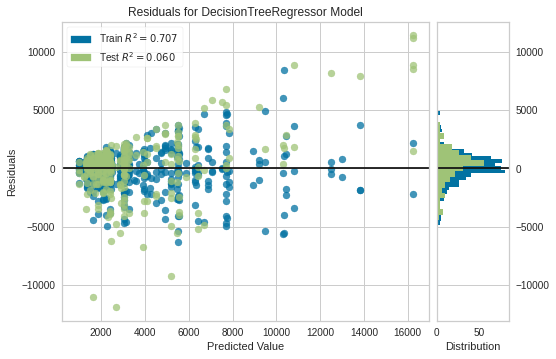

In [53]:
plot_model(calibrado)

In [54]:
modeloR_final = finalize_model(calibrado)

In [55]:
save_model(modeloR_final, 'modelo_reg')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='quantia',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                        max_depth=7, max_features=1.0,
                                        max_leaf_nodes=None,
         

In [56]:
dados1.to_csv('variaveis.csv')